In [1]:
import pandas as pd
import numpy as np
import Bio
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.metrics import roc_curve, RocCurveDisplay
from pathlib import Path

/home/jong505/conda/miniconda3/envs/iadh/lib/python3.13/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
base = Path("/home/jong505/thesis/iadh")
train_test_path = base/Path("iadh_out/ath_bol_aar/train_test2.tsv")
iadh_merged_path = base/Path("iadh_out/ath_bol_aar/merged_results1.tsv")
aar_path = base/Path("data/annotation.all_transcripts.aar.csv")
ath_path = base/Path("data/annotation.all_transcripts.ath.csv")
list_elements = base/Path("iadh_out/ath_bol_aar/list_elements.txt")
tt_sim_orient = base/Path("iadh_out/ath_bol_aar/train_test_sim_orientation.tsv")

train_raw = Path("data/ath_bol_aar/simple_rand_sim_rand_nsim_same_length_axis1_train_raw.tsv")
train = Path("data/ath_bol_aar/simple_blocks_24_mlp_l3_rsrns_same_length_axis1_train.tsv")
sm7_path = Path("data/aar_ath_bol_chi_cpa_tha/sm7_50000_train_seq.tsv")
medium = Path("data/aar_ath_bol_chi_cpa_tha/medium_2g_500_train_raw.tsv")

In [7]:
test = Path("data/ath_bol_aar/simple_rsrns_500_test.tsv")
train = Path("data/ath_bol_aar/simple_rsrns_500_train.tsv")
val = Path("data/ath_bol_aar/simple_rsrns_500_val.tsv")

train = pd.read_csv(train, sep="\t", index_col=0)
test = pd.read_csv(test, sep="\t", index_col=0)
val = pd.read_csv(val, sep="\t", index_col=0)

print(f"Training samples: {train.shape[0]},\t \t postive samples: {train.query('similar == True').shape[0]}")
print(f"Valdidation samples: {val.shape[0]},\t postive samples: {val.query('similar == True').shape[0]}")
print(f"Testing samples: {test.shape[0]},\t \t postive samples: {test.query('similar == True').shape[0]}")
print(f"Total samples: {train.shape[0] + val.shape[0] + test.shape[0]}, \t \t Postive samples: {train.query('similar == True').shape[0] + val.query('similar == True').shape[0] + test.query('similar == True').shape[0]}")

Training samples: 1241,	 	 postive samples: 624
Valdidation samples: 666,	 postive samples: 332
Testing samples: 311,	 	 postive samples: 153
Total samples: 2218, 	 	 Postive samples: 1109


In [18]:
test = Path("data/aar_ath_bol_chi_cpa_tha/medium_2g_500_noflip_test.tsv")
train = Path("data/aar_ath_bol_chi_cpa_tha/medium_2g_500_noflip_train.tsv")
val = Path("data/aar_ath_bol_chi_cpa_tha/medium_2g_500_noflip_val.tsv")

train = pd.read_csv(train, sep="\t", index_col=0)
test = pd.read_csv(test, sep="\t", index_col=0)
val = pd.read_csv(val, sep="\t", index_col=0)

print(f"Training samples: {train.shape[0]},\t \t postive samples: {train.query('similar == True').shape[0]}")
print(f"Valdidation samples: {val.shape[0]},\t postive samples: {val.query('similar == True').shape[0]}")
print(f"Testing samples: {test.shape[0]},\t \t postive samples: {test.query('similar == True').shape[0]}")
print(f"Total samples: {train.shape[0] + val.shape[0] + test.shape[0]}, \t \t Postive samples: {train.query('similar == True').shape[0] + val.query('similar == True').shape[0] + test.query('similar == True').shape[0]}")

Training samples: 873,	 	 postive samples: 445
Valdidation samples: 469,	 postive samples: 234
Testing samples: 219,	 	 postive samples: 102
Total samples: 1561, 	 	 Postive samples: 781


In [16]:
test = Path("data/aar_ath_bol_chi_cpa_tha/medium_2g_500_test.tsv")
train = Path("data/aar_ath_bol_chi_cpa_tha/medium_2g_500_train.tsv")
val = Path("data/aar_ath_bol_chi_cpa_tha/medium_2g_500_val.tsv")

train = pd.read_csv(train, sep="\t", index_col=0)
test = pd.read_csv(test, sep="\t", index_col=0)
val = pd.read_csv(val, sep="\t", index_col=0)

print(f"Training samples: {train.shape[0]},\t \t postive samples: {train.query('similar == True').shape[0]}")
print(f"Valdidation samples: {val.shape[0]},\t postive samples: {val.query('similar == True').shape[0]}")
print(f"Testing samples: {test.shape[0]},\t \t postive samples: {test.query('similar == True').shape[0]}")
print(f"Total samples: {train.shape[0] + val.shape[0] + test.shape[0]}, \t \t Postive samples: {train.query('similar == True').shape[0] + val.query('similar == True').shape[0] + test.query('similar == True').shape[0]}")

Training samples: 1674,	 	 postive samples: 820
Valdidation samples: 897,	 postive samples: 457
Testing samples: 419,	 	 postive samples: 218
Total samples: 2990, 	 	 Postive samples: 1495


In [3]:
df = pd.read_csv(medium, sep="\t", index_col=0)
df.shape[0]
df_dups = df[df.duplicated(subset=['seq_x'], keep=False)].copy()
df_dups.sort_values("seq_x", inplace=True)
df["l_x"]= df.seq_x.apply(len)
df["l_y"]= df.seq_y.apply(len)

In [4]:
print(df.shape)
for i in [30000, 20000, 10000]:
    print(df[(df.l_x < i) & (df.l_y < i)].shape)

(1674, 14)
(1674, 14)
(1674, 14)
(1674, 14)


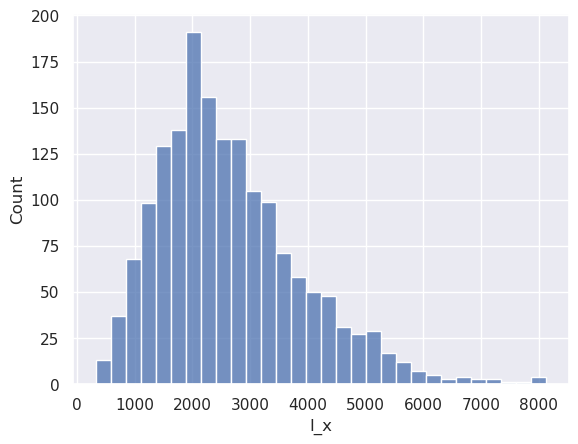

(1674, 14)

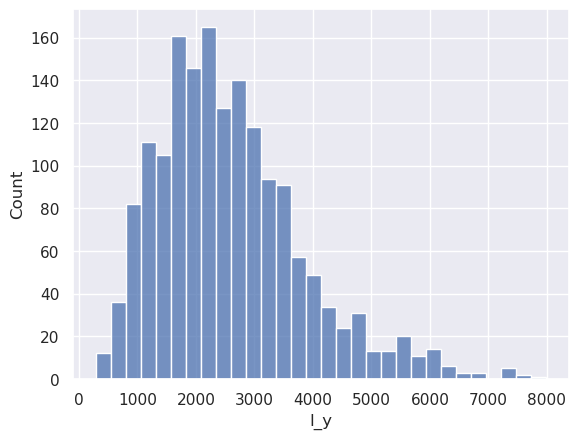

In [6]:
i = 30000
sns.set_theme()
so = sns.histplot(data=df[(df.l_x < i) & (df.l_y < i)], x="l_x")
# so.axvline(int(df.l_x.quantile(0.9)))
plt.show()
so = sns.histplot(data=df[(df.l_x < i) & (df.l_y < i)], x="l_y")
# so.axvline(int(df.l_y.quantile(0.9)))
df.shape


In [13]:
df.head()

,level_0,segment_id_y,familya,gene_xa,gene_ya,segment_id_x,familyb,similar,gene_xb,gene_yb,seq_x,seq_y,l_x,l_y
1058,776,1375,HOM05D000003,Aa31sc571G20,Cpa.g.sc56.61,3649,HOM05D000104,False,BolC8t50557H,THA.LOC104798642,ATGCCACAAACGGTTGGGGCTGTTCCAACCGTCGGTCTGATCGCAC...,ATGGAGAGAAAGAAGCAACTAGGTTCTTCATCTTCCTCTTCCTCTT...,6900,1920
1900,1285,5801,HOM05D002462,AT4G12400,THA.LOC104815925,819,HOM05D000001,False,Cpa.g.sc25.23,BolC3t13326H,ATGGCGGAAGAAGCAAAATCCAAAGGAAACGCAGCTTTCTCTTCCG...,ATGGCCATCGCCGAAATCTCGGCCCAAACATCTTCTTTTCTCGTCG...,4425,2661
1034,390,3309,HOM05D000073,Aa31sc89G150,THA.LOC104799425,1648,HOM05D000004,False,BolC3t15470H,Cpa.g.sc425.5,ATGGCAATTCTGACCAAATCTCATTACTCTTTACTCATTGTTCTTA...,ATGTTGCTGTTTCAGCCTCCTCAAGCAACGCAACCGCCTTATCACT...,2112,2754
1808,893,1104,HOM05D000003,Aa31sc407G40,CARHR111270,5401,HOM05D000956,False,AT3G16470,BolC7t44516H,ATGAAAGAAGTACTAGACAAATACTGCAATATATCGGGTCAAACAA...,AGCAAGTTTGAGAATTTTCACCAAGGAACTGGAAACCAAGGGTACC...,2916,1401
1681,119,3809,HOM05D000123,BolC3t15872H,THA.LOC104803968,1641,HOM05D000004,True,BolC3t15470H,Cpa.g.sc15.113,ATGCCGGGGGAACAAACCGGAGAGGTTGGTGGCGGTTGTAGCGCCG...,ATGGCAGCGATCGTGGACGACGGAGGAAATGGGTCCCCGGCAGTGG...,1590,1752


In [ ]:

row = 10
seq_x = df.iloc[row]["seq_x"]
seq_y = df.iloc[row]["seq_y"]
print(df.iloc[row]["similar"])
print(df.columns)
print(seq_x)
print(seq_y)

counter =0
length = 0
for x,y in zip(seq_x, seq_y):
    if x=="0" or y=="0":
        # print("continue")
        continue
    length+=1
    if x==y:
        counter+=1
print(f"c: {counter}, len: {length} percentage:{counter/length}")

True
Index(['family', 'gene_x', 'gene_y', 'similar', 'seq_x', 'seq_y'], dtype='object')
ATGGCAGCCTATAAAGACTCATTGCTGGCCAGAATCTTTAAAGCACGGTACTTTGCGAAGGCTGATCCTTTCTCAGCCACTCTTGGATCGAGACCTTCATATGCGTGGAGAAGCATTCACTCAGCCCAAAGGTTGATGCGACAGGGTGCAAGAGTAGTCATTGGTAACAGTCACCATAACAATGTTTGGCAAGAACAATGGGTAGAGTGCAAGCCTGCAAGAGGGGTCCAAAAGACAAACCTCAGCTTAGGTCAAAATGAAGGTTTAGTATCATCTGATATGAAGGTCGCAGAGTTGCTGATTGAAGGAACAAGAGAATGGAACAGACTGTTACTGGAGAGGTTGTTCCCACAAGATGAAGTCGAGCAGATTGAAAAGATCAGGCCAGGAGGCACTCTTAGTGACGATGTGTACGGATGGGAGTATACTAAAACAGGGCTCTATAATGTTAAGTCGGGTTATTGGGTGCAGAAGAATGTTTTGGAAGGGAACATGGCGCAAGTACAAGTCTCCCAGCTAAGCATTGATAGTCTATACCAAGCTATTTGGCAGACGAAAACAAGTTCGAAGATCCAACACTTCCTTTGGAAGTGCTTGAGTAACTCTCTACCAACCGCAGAGAATATGACCCATAGACACATAGCAAAAGATGCGAGCTGCCCTCGGTGTGACTCTGGTCCAGAATTGGAAAATCATTTGCTTTTCCAGTGTCCGTATGCGAGGTTCATCTGGACCCTTTCCCCGATCTAA000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

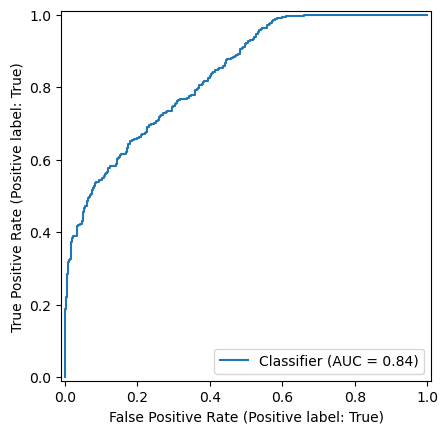

In [47]:
df.em_x = df.em_x.apply(eval)
df.em_y = df.em_y.apply(eval)
def calc_cosine(r: pd.Series):
    em_x = r["em_x"]
    # print(em_x)
    em_y = r["em_y"]
    # m = max(len(em_x),len(em_y) )
    # em_x = np.concat((em_x, np.zeros(m-len(em_x))))
    # em_y = np.concat((em_y, np.zeros(m-len(em_y))))
    return np.dot(em_x, em_y)/ (np.linalg.norm(em_x) * np.linalg.norm(em_y))
df["cosine_sim"] = df.apply(calc_cosine, axis=1)
RocCurveDisplay.from_predictions(df["similar"].tolist(), df["cosine_sim"].tolist(), pos_label=True)

In [3]:
a = np.array([[[1, 2, 5], [3, 4, 8], [3, 4, 8], [3, 4, 8], [3, 4, 8]]])
b = np.array([[[1, 2, 5], [3, 4, 7], [3, 7, 8], [3, 4, 7], [7, 4, 8]]])

print(a.shape)
a_mean = np.mean(a[0], axis=0)
b_mean = np.mean(b[0], axis=0)

print(np.dot(a_mean, b_mean)/ (np.linalg.norm(a_mean) * np.linalg.norm(b_mean)))
a_mean.shape


(1, 5, 3)
0.9926971052952346


(3,)

In [4]:
tt = pd.read_csv(tt_sim_orient, sep="\t", header=0)
tt.Similar.sum()
tt.head()

,Unnamed: 0,segment_id,Similar,genome_x,chr_x,len_profile_x,genome_y,chr_y,len_profile_y,seq_x,seq_y
0,0,4844.0,True,bol,C7,4,ath,Chr1,4,ATGGATGGAGAGGGAAGTAAACCGAAAGCAAATATAGATGATGCGT...,TCATAACACTTTGTCTAAAGAGCTTTTCGATACGGTCCGCATTGGA...
1,1,6863.0,True,aar,sc-152,3,ath,Chr1,3,ATGTCAATCAAGAACATAGTCAGGGAGCTTAGGGGAATCGGCGGTG...,ATGGATTTGTCGCTTTTGTTGGTAACAATAATTCTCTCTTCCTCTC...
2,2,6883.0,True,aar,LG-5,3,ath,Chr1,3,TTATTGGTATTTATTAACAACACCATTATTACCAGCCAAAATCAAG...,ATGAATTTCCGTAATCTGATTGCTTCCGGTTCTCGCCTCGGCAAGA...
3,3,7041.0,True,bol,C6,3,ath,Chr1,3,ATGGCTTCGATTGTCTGCTGTTCCGCTCCATTTACGATCCGAGCAT...,ATGGCTTTGATTATCACCTGCTCCGCTCTACCCACGATCCGAGCAT...
4,4,7042.0,True,bol,C6,3,ath,Chr1,3,ATGGCGATCTCCAAAGTTAGATTGAAGGCTTGGTTCGATAAGAAAA...,TCAAGAACGTGTACACTCAATGCCATGACAAATAGCCAACCAAACA...


In [62]:
merged = pd.read_csv(iadh_merged_path, sep="\t", header=0)
train_test = pd.read_csv(train_test_path, sep="\t", header=0, index_col=0)
ath = pd.read_csv(ath_path, sep="\t", header=0, skiprows=8)
ath.rename(columns={"#gene_id": "gene_id"}, inplace=True)
merged["orientations_x"] = merged["orientations_x"].apply(eval)
merged["orientations_y"] = merged["orientations_y"].apply(eval)

/tmp/ipykernel_4008427/2008027268.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  ath = pd.read_csv(ath_path, sep="\t", header=0, skiprows=8)


In [ ]:
# def sim_orientation(s: pd.Series):
#     lx = s["orientations_x"]
#     ly = s["orientations_y"]
#     return pd.Series([max(lx.count("+"), lx.count("-")) / len(lx), max(ly.count("+"), ly.count("-")) / len(ly)])
# merged["orientations_x"] = merged["orientations_x"].apply(eval)
# merged["orientations_y"] = merged["orientations_y"].apply(eval)
# merged[["sim_orientations_x", "sim_orientations_y"]] = merged.apply(sim_orientation, axis=1)

In [6]:
merged[["sim_orientations_x", "sim_orientations_y"]]

,sim_orientations_x,sim_orientations_y
0,0.509267,0.518877
1,0.513761,0.508308
2,0.500509,0.511971
3,0.504261,0.501795
4,0.536554,0.523778
...,...,...
11525,0.500000,0.575000
11526,0.529412,0.531250
11527,0.542857,0.590909
11528,0.666667,0.583333


In [ ]:
merged[["sim_orientations_x", "begin_x", "end_x", "orientations_x"]].iloc[0]
l = merged[["sim_orientations_x", "begin_x", "end_x", "orientations_x"]].iloc[0]["orientations_x"]
merged[["sim_orientations_x", "begin_x", "end_x", "orientations_x"]].sort_values("sim_orientations_x", ascending=False)

# so = sns.histplot(data=merged[(merged["len_profile_x"]<=7) & (merged["len_profile_y"]<=7) & (merged["genome_x"] != merged["genome_y"])], x="sim_orientations", hue="max_profile_length", multiple="stack")

filter = 1
sim_dir = merged[ (merged["sim_orientations_x"] >= filter) & (merged["sim_orientations_y"] >= filter)][["sim_orientations_x", "sim_orientations_y", "orientations_x", "orientations_y"]]

# for i, r in sim_dir.iterrows():
#     if r["orientations_x"][0] == r["orientations_y"][0]:
#         # print(r[["sim_orientations_x", "sim_orientations_y", "orientations_x", "orientations_y"]])

sim_orientations_x                1.0
sim_orientations_y                1.0
orientations_x        [-, -, -, -, -]
orientations_y        [-, -, -, -, -]
Name: 4049, dtype: object
sim_orientations_x                1.0
sim_orientations_y                1.0
orientations_x        [-, -, -, -, -]
orientations_y        [-, -, -, -, -]
Name: 4050, dtype: object
sim_orientations_x                      1.0
sim_orientations_y                      1.0
orientations_x              [-, -, -, -, -]
orientations_y        [-, -, -, -, -, -, -]
Name: 4097, dtype: object
sim_orientations_x             1.0
sim_orientations_y             1.0
orientations_x        [+, +, +, +]
orientations_y        [+, +, +, +]
Name: 4834, dtype: object
sim_orientations_x             1.0
sim_orientations_y             1.0
orientations_x        [+, +, +, +]
orientations_y        [+, +, +, +]
Name: 4843, dtype: object
sim_orientations_x             1.0
sim_orientations_y             1.0
orientations_x        [-, -, -, -]
orien

In [86]:
ath.query('gene_id == @l_gene')

,gene_id,species,transcript,coord_cds,start,stop,coord_transcript,seq,strand,chr,type,check_transcript,check_protein,transl_table
44045,AT4G04980,ath,AT4G04980.1,"complement(join(2544210..2544422,2544495..2544...",2544210,2547893,"complement(join(2543692..2544422,2544495..2544...",ATGTCAAGCGGGAGGCTTTGCGGCTTCACGCCGATAACCTTCTGTC...,-,Chr4,coding,eq,eq,1.0
83652,AT4G04980,ath,AT4G04980.2,"complement(join(2544886..2545057,2545128..2546...",2544886,2547893,"complement(join(2543948..2544422,2544495..2545...",ATGTCAAGCGGGAGGCTTTGCGGCTTCACGCCGATAACCTTCTGTC...,-,Chr4,coding,eq,eq,NaN
83653,AT4G04980,ath,AT4G04980.3,"complement(join(2544210..2544422,2544495..2544...",2544210,2546833,"complement(join(2544210..2544422,2544495..2544...",ATGAAGGATCTACAAAAGCTATCTCCTGAGATTGTAACCATTAATC...,-,Chr4,coding,eq,eq,NaN


In [90]:
range = train_test.query('genome_y == "ath" and Similar == True').shape[0]
print(f"range: {range}")
i = random.randrange(range)
print(i)

id, wholse_seq, chr = train_test.query('genome_y == "ath" and Similar == True').iloc[i][["segment_id", "seq_y", "chr_y"]]
id = int(id)

f_gene = merged.query(f'id == {id}')["first_y"].item()
print(f_gene)

f_orientation = merged.query(f'id == {id}')["orientations_y"].item()[0]
l_gene = merged.query(f'id == {id}')["last_y"].item()
l_orientation = merged.query(f'id == {id}')["orientations_y"].item()[-1]

print("wat")
display(ath.query('gene_id == @l_gene')["seq"])

f_ref_seq = ath.query('gene_id == @f_gene')["seq"].item()
l_ref_seq = ath.query('gene_id == @l_gene')["seq"].item()

wholse_seq = Seq(wholse_seq)
f_ref_seq = Seq(f_ref_seq)
l_ref_seq = Seq(l_ref_seq)

print(f"id: {id}, first gene: {f_gene}({f_orientation}), last gene: {l_gene}({l_orientation}), chr: {chr}, seq[:10]: {len(wholse_seq)}, f_ref_seq[:10] {len(f_ref_seq)}, l_ref_seq[:10] {len(l_ref_seq)},")

if f_orientation == "-":
    f_ref_seq = f_ref_seq.reverse_complement()
if l_orientation == "-":
    l_ref_seq = l_ref_seq.reverse_complement()


align = pairwise2.align.globalms(wholse_seq, f_ref_seq, 2, -1, -.5, -.1)
print(format_alignment(*align[0]))

align = pairwise2.align.globalms(wholse_seq, l_ref_seq, 2, -1, -.5, -.1)
print(format_alignment(*align[0]))

range: 468
70
AT1G72410
wat


8745    ATGGCCAAAGTTGGGAAGCTGACAAAGCTTAAGTCGGCTATGAAGA...
Name: seq, dtype: object

ValueError: can only convert an array of size 1 to a Python scalar

In [25]:
merged.query(f'id == {id}')[["id", "genome_x", "list_x", "begin_x", "end_x", "first_x", "last_x", "start_x", "stop_x"]]
# merged.columns

,id,genome_x,list_x,begin_x,end_x,first_x,last_x,start_x,stop_x
4070,4071,aar,sc-179,1,6,Aa31sc179G20,Aa31sc179G70,7403,53612


In [26]:
print(f_ref_seq.reverse_complement())
print(f_ref_seq.reverse_complement()[0]+wholse_seq)

CTAGTTTCGGGACATGGTTGGTTCAAGCAGCGGAGGCGCAGTCGCAATCACAGCAATTCGTGCTCGACGTTGCATATTACCATACCATCCAATAGACAAGTCAAAGGACTGTTGACGAAGCTGTCTATACTCTTGACAAAGAGCACATAGATGACAACAACAATGGACACAACAATCGCAACATGGTCTCTCCTTTAACTCATATTGTCCTCTTAATTTAGTCCGATAAAAGCACGAATAAAGGCTAGTCCCAACACAGCCTGTAGCCATCATTAACATCATGTACATGGCTCCACTCATCCCACATGATGTAGAGCCTCTGTCTACAATCTCAGCGATCCGGCCAAAGGCTACGCAGGGACACCAACACGTCAAGCAACATGAGTGGAGATCAAGACAACATTCACAAAGACCAGTGGACCAATCCATGGATTTGCCTTTAACAATGGAGGTTGTTGGAGGCTCCAT
CTAGTTTCGGGACATGGTTGGTTCAAGCAGCGGAGGCGCAGTCGCAATCACAGCAATTCGTGCTCGACGTTGCATATTACCATACCATCCAATAGACAAGTCAAAGGACTGTTGACGAAGCTGTCTATACTCTTGACAAAGAGCACATAGATGACAACAACAATGGACACAACAATCGCAACATGGTCTCTCCTTTAACTCATATTGTCCTCTTAATTTAGTCCGATAAAAGCACGAATAAAGGCTAGTCCCAACACAGCCTGTAGCCATCATTAACATCATGTACATGGCTCCACTCATCCCACATGATGTAGAGCCTCTGTCTACAATCTCAGCGATCCGGCCAAAGGCTACGCAGGGACACCAACACGTCAAGCAACCTGTTACGTCTCAAAATATACATAAATAAGTAACACACACATATATTATATATAATATGTAGAGTAAATATATCATGACTTACATGAGTGGAGATCAAGACAACATTCACAAAGACCAGTGGACCAATCCATGGATTTGCCTTTAACAATG

In [27]:
align = pairwise2.align.globalms(wholse_seq, f_ref_seq.reverse_complement(), 2, -1, -.5, -.1)
print(format_alignment(*align[0]))

-TAGTTTCGGGACATGGTTGGTTCAAGCAGCGGAGGCGCAGTCGCAATCACAGCAATTCGTGCTCGACGTTGCATATTACCATACCATCCAATAGACAAGTCAAAGGACTGTTGACGAAGCTGTCTATACTCTTGACAAAGAGCACATAGATGACAACAACAATGGACACAACAATCGCAACATGGTCTCTCCTTTAACTCATATTGTCCTCTTAATTTAGTCCGATAAAAGCACGAATAAAGGCTAGTCCCAACACAGCCTGTAGCCATCATTAACATCATGTACATGGCTCCACTCATCCCACATGATGTAGAGCCTCTGTCTACAATCTCAGCGATCCGGCCAAAGGCTACGCAGGGACACCAACACGTCAAGCAACCTGTTACGTCTCAAAATATACATAAATAAGTAACACACACATATATTATATATAATATGTAGAGTAAATATATCATGACTTACATGAGTGGAGATCAAGACAACATTCACAAAGACCAGTGGACCAATCCATGGATTTGCCTTTAACAATGGAGGTTGTTGGAGGCTCCATGTGTCTTTTTTTTATTCTCTTTTGTTTTTTTTTTTTCTTCTCTTGTGGTTATTTTATTAATCGTTAGGTAGTTATATGTAAAGGACGCGTATATTTATGGCACCACTTGATGAACTAACCGTCAGGAACCGCAAGGATGCTTCGTTTGGTGACTCAAAATCTAGACGCCTTTTTAATCATAATTATAAATTTATTAATAATCAAACTGAAATTATTTCATTACAAAGTAAAACTAAGGAGGTGCAGACACGATTAATAGTAGCAGTATATTTATTTAAATAGGCATACAAATTCAGTTATAAATTTATTTACAATTAATTGTGTCAAATTTGACATGTGAATGAATATATCACACAATAAATTCAAAATAATTATTATTGAATCAATTATATATCCCTATAGTATTTTATGATTTGATCATTTTAACATTATGCTTTAAGTATAATATA

In [32]:
align = pairwise2.align.globalms(wholse_seq, l_ref_seq.reverse_complement(), 2, -1, -.5, -.1)
print(format_alignment(*align[0]))

TAGTTTCGGGACATGGTTGGTTCAAGCAGCGGAGGCGCAGTCGCAATCACAGCAATTCGTGCTCGACGTTGCATATTACCATACCATCCAATAGACAAGTCAAAGGACTGTTGACGAAGCTGTCTATACTCTTGACAAAGAGCACATAGATGACAACAACAATGGACACAACAATCGCAACATGGTCTCTCCTTTAACTCATATTGTCCTCTTAATTTAGTCCGATAAAAGCACGAATAAAGGCTAGTCCCAACACAGCCTGTAGCCATCATTAACATCATGTACATGGCTCCACTCATCCCACATGATGTAGAGCCTCTGTCTACAATCTCAGCGATCCGGCCAAAGGCTACGCAGGGACACCAACACGTCAAGCAACCTGTTACGTCTCAAAATATACATAAATAAGTAACACACACATATATTATATATAATATGTAGAGTAAATATATCATGACTTACATGAGTGGAGATCAAGACAACATTCACAAAGACCAGTGGACCAATCCATGGATTTGCCTTTAACAATGGAGGTTGTTGGAGGCTCCATGTGTCTTTTTTTTATTCTCTTTTGTTTTTTTTTTTTCTTCTCTTGTGGTTATTTTATTAATCGTTAGGTAGTTATATGTAAAGGACGCGTATATTTATGGCACCACTTGATGAACTAACCGTCAGGAACCGCAAGGATGCTTCGTTTGGTGACTCAAAATCTAGACGCCTTTTTAATCATAATTATAAATTTATTAATAATCAAACTGAAATTATTTCATTACAAAGTAAAACTAAGGAGGTGCAGACACGATTAATAGTAGCAGTATATTTATTTAAATAGGCATACAAATTCAGTTATAAATTTATTTACAATTAATTGTGTCAAATTTGACATGTGAATGAATATATCACACAATAAATTCAAAATAATTATTATTGAATCAATTATATATCCCTATAGTATTTTATGATTTGATCATTTTAACATTATGCTTTAAGTATAATATAC